In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('C:\\Users\\Abhi\\Projects\\Ticket_Classification\\Cleaned_RNN_data.xlsx')
print(data.head(5))

                                             Summary       Artifact__ID
0  C1_11811_LO_DBC5rt_WARNING - LO:lrdoemt01_lrdo...  Artifact_A0046224
1  I030MON01P_C2_10381_LO_bkgrp_warn - backup:ffm...  Artifact_00052957
2  I030MON01P_C2_10381_LO_UF_Bkgrp_Crit - backup:...  Artifact_00052957
3  C3_10381_LO_bkgrp_warning - klo_backup:DRNBACK...  Artifact_00052763
4  C3_10381_LO_bkgrp_warning - klo_backup:DRNBACK...  Artifact_00052763


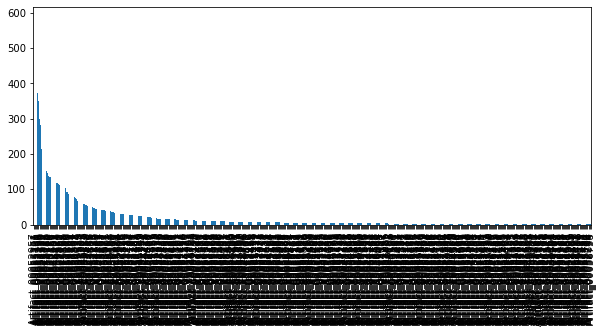

In [3]:
my_tags = ['Artifact_A0046224','Artifact_00052957','Artifact_00023328','Artifact_00052763','Artifact_00053166','Artifact_00053456','Artifact_00053264','Artifact_E0046795','Artifact_E0046804','Artifact_00054674']
plt.figure(figsize=(10,4))
data.Artifact__ID.value_counts().plot(kind='bar');

In [4]:
X=data.Summary
y=data.Artifact__ID
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.34761321909424725


In [6]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=9, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6064871481028152


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB()) 
Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb', MultinomialNB(alpha=1.0,
                                                class_prior=None,
                                                fit_prior=True))],
         )


Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
'''
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
'''
#logrgeg = LogisticRegression()

logreg.fit(X, y)


y_pred = logreg.predict(X_test)


print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.936046511627907
